https://www.youtube.com/watch?v=MJ1945J_W0c
https://github.com/MariyaSha/PlottingGraphs/blob/master/Matplotlib%20(1).ipynb

In [9]:
from pytrends.request import TrendReq

# Make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')

# Extract data about weekly searches of certain keywords
keywords = ["Python", "R", "C++", "Java", "HTML"]
pytrends.build_payload(keywords, timeframe='today 5-y')

In [10]:
# Store keywords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)

data.tail()

,Python,R,C++,Java,HTML
date,,,,,
2021-08-01,21,47,85,18,9
2021-08-08,21,48,85,18,9
2021-08-15,21,48,85,18,9
2021-08-22,21,48,84,18,9
2021-08-29,21,49,85,19,9


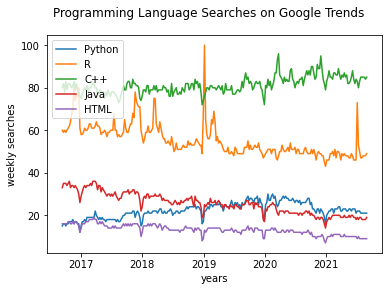

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Plot data
plt.plot(data)

# Add titles
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')
plt.ylabel('weekly searches')

# Add legend
plt.legend(keywords, loc='upper left')

plt.show()
plt.savefig('best_language.png')

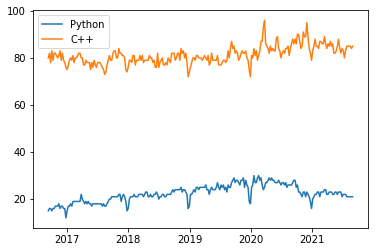

In [13]:
# Analyze data
focus = ['Python', 'C++']

plt.plot(data[focus])
plt.legend(focus)

In [14]:
import pandas as pd

# Extract country-level keywords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

# Get countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)

# Convert to dataframe
data2 = data2.to_frame()

data2

,Python
geoName,
China,49
Eritrea,34
Israel,34
St. Helena,27
Singapore,24
South Korea,24
Iceland,21
Russia,21
Taiwan,21


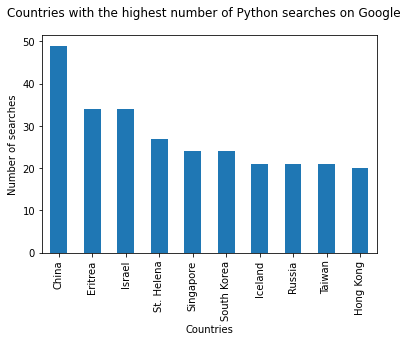

In [15]:
# Plot a bar chart
data2.plot(kind='bar', legend=None)

# Titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

In [16]:
data3 = country_data[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,17,14,38,20,11
Curaçao,6,34,48,6,6
Cyprus,13,22,44,11,10
Czechia,14,22,41,14,9
Côte d’Ivoire,6,16,49,23,6


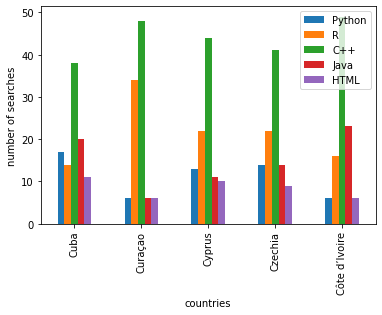

In [17]:
# Plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()